In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [49]:
nascidos_df = pd.read_csv('SINASC_RO_2019.csv')
nascidos_df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [50]:
nascidos_df.loc[nascidos_df['APGAR5'] <= 3, 'asfixia'] = 'asfixia grave'
nascidos_df.loc[(nascidos_df['APGAR5'] >= 4) & (nascidos_df['APGAR5'] <= 5), 'asfixia'] = 'asfixia moderada'
nascidos_df.loc[(nascidos_df['APGAR5'] >= 6) & (nascidos_df['APGAR5'] <= 7), 'asfixia'] = 'asfixia leve'
nascidos_df.loc[nascidos_df['APGAR5'] >= 8, 'asfixia'] = 'normal'
nascidos_df['asfixia']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: asfixia, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<AxesSubplot:xlabel='asfixia', ylabel='count'>

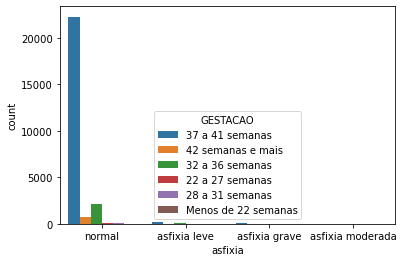

In [51]:
sns.countplot(x='asfixia'
             , hue='GESTACAO'
             , data=nascidos_df)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

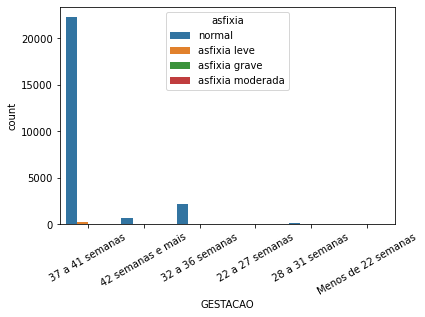

In [52]:
g = sns.countplot(x='GESTACAO'
             , hue='asfixia'
             , data=nascidos_df)
g.tick_params(axis='x', rotation=30)

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [53]:
freq = pd.crosstab(nascidos_df['GESTACAO'], nascidos_df['asfixia'])
percent = freq.div(freq.sum(axis=1), axis=0)
percent

asfixia,asfixia grave,asfixia leve,asfixia moderada,normal
GESTACAO,,,,
22 a 27 semanas,0.247059,0.141176,0.011765,0.600000
28 a 31 semanas,0.018519,0.111111,0.074074,0.796296
32 a 36 semanas,0.003581,0.032677,0.008505,0.955237
37 a 41 semanas,0.001465,0.008702,0.001243,0.988589
42 semanas e mais,0.001433,0.008596,0.001433,0.988539
Menos de 22 semanas,0.285714,0.142857,0.000000,0.571429


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

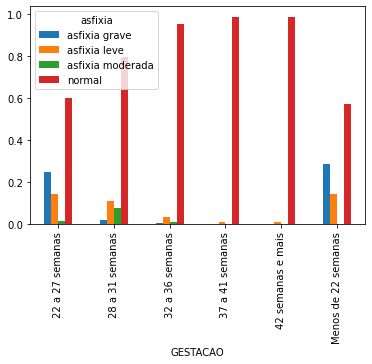

In [54]:
percent.plot.bar()

De acordo com o gráfico, podemos concordar com o médico, pois o número de asfixia grave quando o parto ocorre com menos de 37 semanas é maior que o dobro e a asfixia moderada é maior ainda.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<AxesSubplot:xlabel='PESO', ylabel='asfixia'>

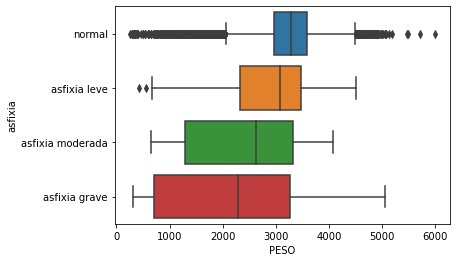

In [59]:
sns.boxplot(data=nascidos_df
            , x='PESO'
            , y= 'asfixia'
            , order=['normal', 'asfixia leve', 'asfixia moderada', 'asfixia grave'])

Observa-se que a ocorrência de asfixia no bebê ocorre quando ele nasce com um peso baixo.